In [1]:
from pickle import load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
src, configs, n_params_, losses_accs_ = load(open('train_projection=64_epochs=100_lr=5e-4_sess=5', 'rb'))

In [3]:
losses_accs_df = list(map(lambda x: pd.DataFrame(x), losses_accs_))

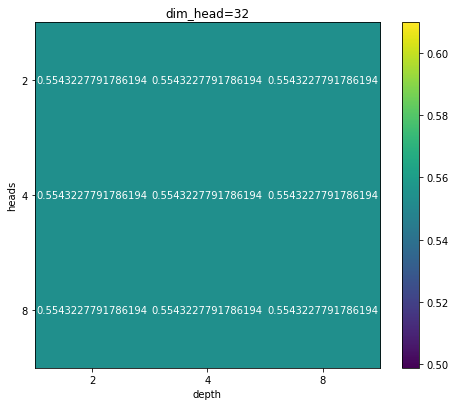

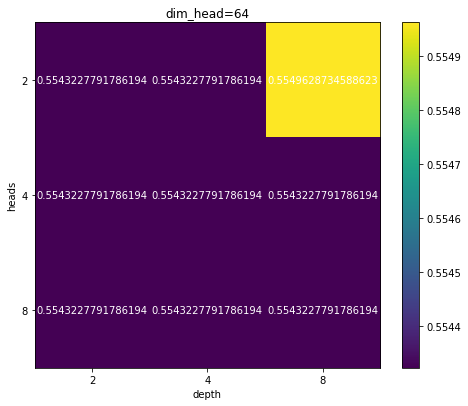

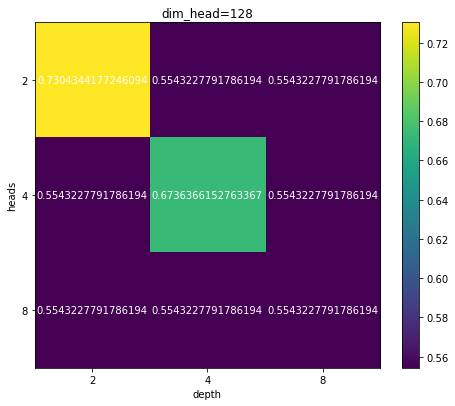

In [4]:
heads = [2, 4, 8]
depth = [2, 4, 8,]

for dim_head in [32, 64, 128]:

    scores = np.empty((3,3))
    for i, config in enumerate(configs):
        if config['dim_head'] == dim_head:
            scores[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].val_acc.max()

    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', )#cmap=plt.cm.hot)
    plt.ylabel('heads')
    plt.xlabel('depth')
    plt.colorbar()
    plt.xticks(np.arange(len(heads)), heads)
    plt.yticks(np.arange(len(depth)), depth)
    plt.title(f'dim_head={dim_head}')
    for i in range(len(heads)):
        for j in range(len(depth)):
            text = plt.text(j, i, scores[i, j],
                           ha="center", va="center", color="w")
    plt.show()

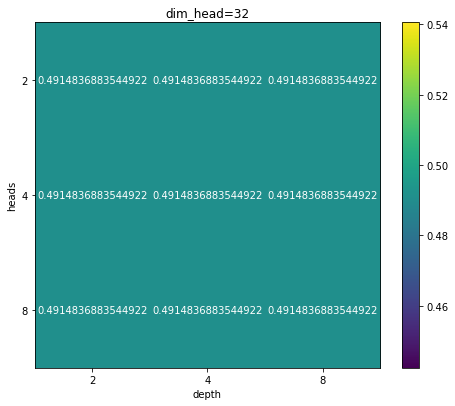

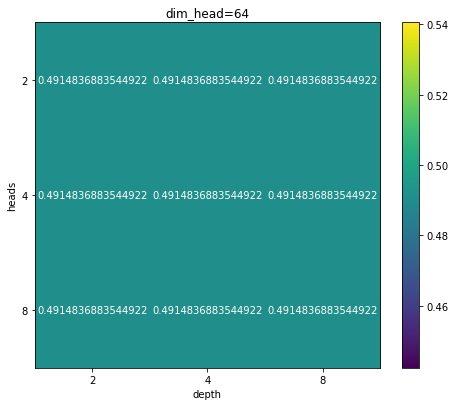

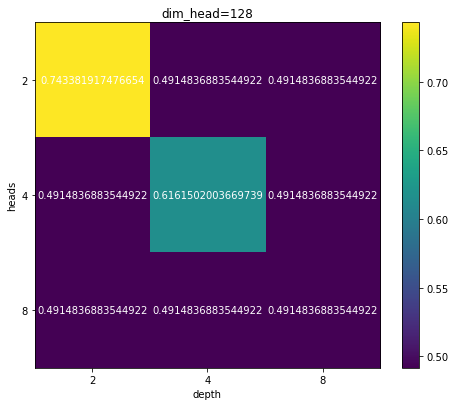

In [20]:
heads = [2, 4, 8]
depth = [2, 4, 8,]

for dim_head in [32, 64, 128]:

    scores = np.empty((3,3))
    for i, config in enumerate(configs):
        if config['dim_head'] == dim_head:
            scores[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].test_acc[losses_accs_df[i].val_acc.argmax()]

    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', )#cmap=plt.cm.hot)
    plt.ylabel('heads')
    plt.xlabel('depth')
    plt.colorbar()
    plt.xticks(np.arange(len(heads)), heads)
    plt.yticks(np.arange(len(depth)), depth)
    plt.title(f'dim_head={dim_head}')
    for i in range(len(heads)):
        for j in range(len(depth)):
            text = plt.text(j, i, scores[i, j],
                           ha="center", va="center", color="w")
    plt.show()

In [27]:
pd.set_option('display.max_rows', 1000)
i = 6
configs[i], losses_accs_df[i]

({'channels': 14,
  'depth': 2,
  'dim': 64,
  'dim_head': 128,
  'dropout': 0.2,
  'emb_dropout': 0,
  'heads': 2,
  'image_size': (1, 300),
  'mlp_dim': 128,
  'num_classes': 8,
  'patch_size': (1, 20),
  'pool': 'cls',
  'use_cls_token': True},
     train_loss  train_acc  val_loss   val_acc  test_loss  test_acc
 0     1.595231   0.541029  1.561398  0.554323   1.720421  0.491484
 1     1.586711   0.541029  1.553397  0.554323   1.701901  0.491484
 2     1.586981   0.541029  1.553030  0.554323   1.702111  0.491484
 3     1.588106   0.541029  1.553819  0.554323   1.701643  0.491484
 4     1.590008   0.541029  1.556454  0.554323   1.711168  0.491484
 5     1.587014   0.541029  1.552674  0.554323   1.699363  0.491484
 6     1.587554   0.541029  1.555122  0.554323   1.699317  0.491484
 7     1.586366   0.541029  1.554341  0.554323   1.696734  0.491484
 8     1.590476   0.541029  1.557950  0.554323   1.713699  0.491484
 9     1.586491   0.541029  1.552301  0.554323   1.697770  0.491484
 10 